# **General Requirements**

In [30]:
import pandas as pd

# Load the dataset
file_path = '221100911_Seleem_Data.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(data.head())


  userId movieId  rating
0     U1      I1     2.0
1     U2      I1     3.0
2     U3      I1     2.0
3     U4      I1     2.0
4     U6      I1     5.0


In [17]:
# Assuming the dataset has a column named 'rating' that needs adjustment
# If the column name is different, replace 'rating' with the correct column name

# Normalize the ratings to a 1-to-5 scale
data['rating'] = data['rating'].apply(lambda x: max(1, min(5, x)))

# Verify the adjustment
print(data['rating'].describe())

count    4500.000000
mean        2.988667
std         1.397647
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64


In [18]:
Tnu = data['userId'].nunique()

# Print the total number of users
print(f"Total number of users (Tnu): {Tnu}")


Total number of users (Tnu): 100


In [19]:
Tni = data['movieId'].nunique()

# Print the total number of items
print(f"Total number of items (Tni): {Tni}")

Total number of items (Tni): 50


In [20]:
item_rating_counts = data['movieId'].value_counts()

# Display the result
print(item_rating_counts.head())  # Display the top 5 items with the highest number of ratings

movieId
I35    95
I42    95
I24    95
I38    95
I11    95
Name: count, dtype: int64


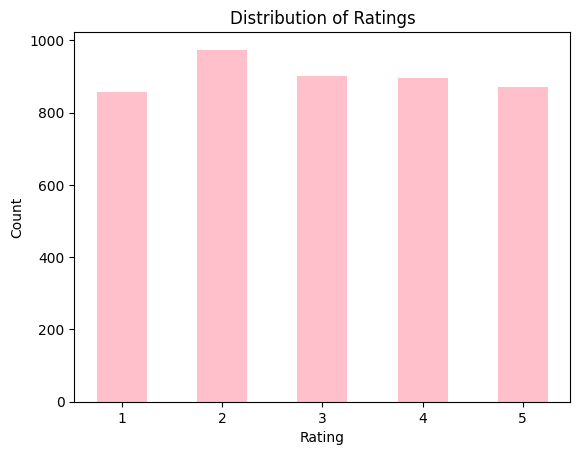

Matrix sparsity: 10.00%
Mean rating: 2.99
Standard deviation of ratings: 1.40
No significant bias detected.


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Draw the distribution of ratings
rating_counts = data['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, width=0.5, color='pink')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.show()

# Check for sparsity
total_possible_ratings = Tnu * Tni  # Total possible ratings (users * items)
total_actual_ratings = len(data)   # Total actual ratings in the dataset
sparsity = 1 - (total_actual_ratings / total_possible_ratings)

print(f"Matrix sparsity: {sparsity:.2%}")

# Check for bias
mean_rating = data['rating'].mean()
std_dev_rating = data['rating'].std()
print(f"Mean rating: {mean_rating:.2f}")
print(f"Standard deviation of ratings: {std_dev_rating:.2f}")

if mean_rating > 3.5:
    print("Bias detected: Ratings are generally high.")
elif mean_rating < 2.5:
    print("Bias detected: Ratings are generally low.")
else:
    print("No significant bias detected.")

In [22]:
# Calculate the average rating for each item (movie)
item_avg_ratings = data.groupby('movieId')['rating'].mean()

# Identify the two items with the lowest average ratings
lowest_rated_items = item_avg_ratings.nsmallest(2)

# Assign them to I1 and I2
I1, I2 = lowest_rated_items.index

# Print the results
print(f"Lowest-rated item 1 (I1): {I1}, with average rating: {lowest_rated_items[I1]:.2f}")
print(f"Lowest-rated item 2 (I2): {I2}, with average rating: {lowest_rated_items[I2]:.2f}")

Lowest-rated item 1 (I1): I1, with average rating: 2.68
Lowest-rated item 2 (I2): I32, with average rating: 2.76


# **Part 1**

In [23]:
# Calculate the average rating for each of the target items I1 and I2
avg_rating_I1 = data[data['movieId'] == I1]['rating'].mean()
avg_rating_I2 = data[data['movieId'] == I2]['rating'].mean()

# Print the results
print(f"Average rating for I1 (movieId {I1}): {avg_rating_I1:.2f}")
print(f"Average rating for I2 (movieId {I2}): {avg_rating_I2:.2f}")

Average rating for I1 (movieId I1): 2.68
Average rating for I2 (movieId I32): 2.76


In [24]:
# Replace missing ratings (NaN) for I1 and I2 with their respective average ratings
# Assuming 'rating' column contains NaN for unspecified ratings

# Create a pivot table for the user-item matrix
user_item_matrix = data.pivot(index='userId', columns='movieId', values='rating')

# Fill missing ratings for I1 and I2 with their respective mean ratings
user_item_matrix[I1].fillna(avg_rating_I1, inplace=True)
user_item_matrix[I2].fillna(avg_rating_I2, inplace=True)

# Print a preview of the updated matrix for I1 and I2
print(user_item_matrix[[I1, I2]].head())

movieId        I1  I32
userId                
U1       2.000000  2.0
U10      1.000000  2.0
U100     2.678571  1.0
U11      2.678571  1.0
U12      2.000000  1.0


<ipython-input-24-435508a90fe9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_item_matrix[I1].fillna(avg_rating_I1, inplace=True)
<ipython-input-24-435508a90fe9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [25]:
# Calculate the average rating for each item (movie) in the updated user-item matrix
average_ratings = user_item_matrix.mean(axis=0)

# Print the average ratings for all items
print("Average ratings for each item:")
print(average_ratings.head())

Average ratings for each item:
movieId
I1     2.678571
I10    3.235294
I11    3.073684
I12    2.845238
I13    3.188889
dtype: float64


In [26]:
# Subtract the mean rating of each item from its corresponding ratings
# Normalize ratings for all items by subtracting their mean ratings
ratings_diff_all_items = user_item_matrix.subtract(average_ratings, axis=1)

# Print a preview of the normalized ratings
print("Difference between ratings and the mean rating of all items:")
print(ratings_diff_all_items.head())

Difference between ratings and the mean rating of all items:
movieId            I1       I10       I11       I12       I13       I14  \
userId                                                                    
U1      -6.785714e-01  1.764706 -2.073684 -1.845238 -1.188889 -0.047619   
U10     -1.678571e+00  0.764706  1.926316 -0.845238 -0.188889 -2.047619   
U100    -4.440892e-16       NaN -0.073684  0.154762 -2.188889 -0.047619   
U11     -4.440892e-16 -2.235294  1.926316  0.154762  0.811111 -1.047619   
U12     -6.785714e-01  0.764706 -1.073684  2.154762  0.811111 -1.047619   

movieId       I15       I16  I17       I18  ...       I46       I47       I48  \
userId                                      ...                                 
U1       1.090909 -0.816092  1.0  0.736264  ... -0.032609 -1.976744  2.172043   
U10      1.090909 -1.816092  2.0  1.736264  ...  1.967391  1.023256  0.172043   
U100    -1.909091 -1.816092 -2.0 -0.263736  ...  1.967391       NaN -0.827957   
U11     

In [27]:
# Calculate the covariance between each item and I1
covariance_with_I1 = ratings_diff_all_items.cov()[I1]

# Calculate the covariance between each item and I2
covariance_with_I2 = ratings_diff_all_items.cov()[I2]

# Combine the results into a DataFrame for better visualization
covariance_results = pd.DataFrame({
    'Item': ratings_diff_all_items.columns,
    'Covariance_with_I1': covariance_with_I1.values,
    'Covariance_with_I2': covariance_with_I2.values
})

# Display the covariance results
print("Covariance between each item and the target items (I1 and I2):")
print(covariance_results)

Covariance between each item and the target items (I1 and I2):
   Item  Covariance_with_I1  Covariance_with_I2
0    I1            1.760823           -0.305002
1   I10           -0.160539           -0.056754
2   I11           -0.683891           -0.103011
3   I12           -0.034065           -0.101559
4   I13           -0.233953            0.042871
5   I14           -0.160684           -0.033595
6   I15           -0.392633            0.191873
7   I16           -0.319195            0.079313
8   I17           -0.098214           -0.203865
9   I18           -0.029884            0.057699
10  I19            0.114215           -0.048360
11   I2           -0.329615            0.207957
12  I20           -0.103297            0.229060
13  I21           -0.056191           -0.083389
14  I22            0.108079           -0.234069
15  I23           -0.211115           -0.251876
16  I24            0.247404           -0.042068
17  I25            0.179049            0.135299
18  I26            0.0642

In [31]:
# Generate the covariance matrix for all items
covariance_matrix = ratings_diff_all_items.cov()

# Display a preview of the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix.head())

Covariance Matrix:
movieId        I1       I10       I11       I12       I13       I14       I15  \
movieId                                                                         
I1       1.760823 -0.160539 -0.683891 -0.034065 -0.233953 -0.160684 -0.392633   
I10     -0.160539  2.015406  0.496605  0.183099 -0.281100  0.058551  0.200000   
I11     -0.683891  0.496605  2.026428  0.284177  0.050000 -0.160957  0.265354   
I12     -0.034065  0.183099  0.284177  1.915519 -0.302481 -0.471636  0.205099   
I13     -0.233953 -0.281100  0.050000 -0.302481  1.907740 -0.437193  0.277160   

movieId       I16       I17       I18  ...       I46       I47       I48  \
movieId                                ...                                 
I1      -0.319195 -0.098214 -0.029884  ...  0.016317 -0.379470 -0.131887   
I10      0.563380  0.237261 -0.199590  ...  0.214785  0.126667 -0.078481   
I11      0.450467  0.100705 -0.024592  ... -0.257017  0.295242 -0.112069   
I12      0.375951  0.297036  0.08

In [32]:
# Get the top 5 peers for I1
top_5_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:6]

# Get the top 10 peers for I1
top_10_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:11]

# Get the top 5 peers for I2
top_5_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:6]

# Get the top 10 peers for I2
top_10_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:11]

# Display the results
print("Top 5 peers for I1:")
print(top_5_peers_I1)
print("\nTop 10 peers for I1:")
print(top_10_peers_I1)
print("\nTop 5 peers for I2:")
print(top_5_peers_I2)
print("\nTop 10 peers for I2:")
print(top_10_peers_I2)

Top 5 peers for I1:
movieId
I5     0.519050
I40    0.421960
I27    0.296433
I34    0.284707
I31    0.264982
Name: I1, dtype: float64

Top 10 peers for I1:
movieId
I5     0.519050
I40    0.421960
I27    0.296433
I34    0.284707
I31    0.264982
I24    0.247404
I30    0.181877
I25    0.179049
I36    0.132439
I49    0.115959
Name: I1, dtype: float64

Top 5 peers for I2:
movieId
I37    0.399512
I7     0.391855
I3     0.366410
I33    0.358670
I35    0.242255
Name: I32, dtype: float64

Top 10 peers for I2:
movieId
I37    0.399512
I7     0.391855
I3     0.366410
I33    0.358670
I35    0.242255
I20    0.229060
I2     0.207957
I15    0.191873
I40    0.183662
I43    0.162497
Name: I32, dtype: float64


In [34]:
# Reduced space for each user based on top 5 peers of I1 and I2
top_5_items = list(set(top_5_peers_I1.index).union(set(top_5_peers_I2.index)))
reduced_space_5 = user_item_matrix[top_5_items]

# Display the reduced dimensional space
print("Reduced dimensional space using top 5 peers:")
print(reduced_space_5.head())

Reduced dimensional space using top 5 peers:
movieId  I37  I31  I27  I35  I34  I40   I3  I33   I5   I7
userId                                                   
U1       2.0  5.0  4.0  3.0  2.0  4.0  2.0  5.0  5.0  1.0
U10      2.0  2.0  2.0  4.0  5.0  NaN  2.0  2.0  2.0  4.0
U100     5.0  5.0  4.0  1.0  2.0  3.0  5.0  5.0  2.0  2.0
U11      4.0  4.0  4.0  1.0  NaN  1.0  3.0  1.0  5.0  3.0
U12      5.0  5.0  2.0  4.0  1.0  1.0  1.0  3.0  1.0  4.0


In [35]:
# Predict missing ratings for I1
predicted_rating_I1 = reduced_space_5[top_5_peers_I1.index].mean(axis=1)

# Predict missing ratings for I2
predicted_rating_I2 = reduced_space_5[top_5_peers_I2.index].mean(axis=1)

# Display the predictions
print("Predicted ratings for I1 using top 5 peers:")
print(predicted_rating_I1.head())
print("\nPredicted ratings for I2 using top 5 peers:")
print(predicted_rating_I2.head())

Predicted ratings for I1 using top 5 peers:
userId
U1      4.00
U10     2.75
U100    3.20
U11     3.50
U12     2.00
dtype: float64

Predicted ratings for I2 using top 5 peers:
userId
U1      2.6
U10     2.8
U100    3.6
U11     2.4
U12     3.4
dtype: float64


In [37]:
# Reduced space for each user based on top 10 peers of I1 and I2
top_10_items = list(set(top_10_peers_I1.index).union(set(top_10_peers_I2.index)))
reduced_space_10 = user_item_matrix[top_10_items]

# Display the reduced dimensional space
print("Reduced dimensional space using top 10 peers:")
print(reduced_space_10.head())

Reduced dimensional space using top 10 peers:
movieId  I37  I15  I34   I3  I43   I5  I25  I24   I2   I7  I31  I20  I27  I49  \
userId                                                                          
U1       2.0  4.0  2.0  2.0  NaN  5.0  4.0  5.0  4.0  1.0  5.0  5.0  4.0  1.0   
U10      2.0  4.0  5.0  2.0  1.0  2.0  1.0  2.0  NaN  4.0  2.0  4.0  2.0  2.0   
U100     5.0  1.0  2.0  5.0  1.0  2.0  4.0  NaN  3.0  2.0  5.0  5.0  4.0  4.0   
U11      4.0  2.0  NaN  3.0  4.0  5.0  3.0  4.0  NaN  3.0  4.0  1.0  4.0  5.0   
U12      5.0  3.0  1.0  1.0  3.0  1.0  NaN  5.0  NaN  4.0  5.0  2.0  2.0  1.0   

movieId  I35  I40  I30  I36  I33  
userId                            
U1       3.0  4.0  NaN  5.0  5.0  
U10      4.0  NaN  3.0  2.0  2.0  
U100     1.0  3.0  3.0  5.0  5.0  
U11      1.0  1.0  1.0  4.0  1.0  
U12      4.0  1.0  2.0  4.0  3.0  


In [38]:
# Predict missing ratings for I1
predicted_rating_I1_10 = reduced_space_10[top_10_peers_I1.index].mean(axis=1)

# Predict missing ratings for I2
predicted_rating_I2_10 = reduced_space_10[top_10_peers_I2.index].mean(axis=1)

# Display the predictions
print("Predicted ratings for I1 using top 10 peers:")
print(predicted_rating_I1_10.head())
print("\nPredicted ratings for I2 using top 10 peers:")
print(predicted_rating_I2_10.head())

Predicted ratings for I1 using top 10 peers:
userId
U1      3.888889
U10     2.333333
U100    3.555556
U11     3.444444
U12     2.444444
dtype: float64

Predicted ratings for I2 using top 10 peers:
userId
U1      3.333333
U10     2.875000
U100    3.100000
U11     2.222222
U12     2.888889
dtype: float64


In [39]:
# Compare predictions
comparison_I1 = pd.DataFrame({
    "Top 5 Peers": predicted_rating_I1,
    "Top 10 Peers": predicted_rating_I1_10
})

comparison_I2 = pd.DataFrame({
    "Top 5 Peers": predicted_rating_I2,
    "Top 10 Peers": predicted_rating_I2_10
})

# Display the comparisons
print("Comparison of predictions for I1:")
print(comparison_I1.head())
print("\nComparison of predictions for I2:")
print(comparison_I2.head())

Comparison of predictions for I1:
        Top 5 Peers  Top 10 Peers
userId                           
U1             4.00      3.888889
U10            2.75      2.333333
U100           3.20      3.555556
U11            3.50      3.444444
U12            2.00      2.444444

Comparison of predictions for I2:
        Top 5 Peers  Top 10 Peers
userId                           
U1              2.6      3.333333
U10             2.8      2.875000
U100            3.6      3.100000
U11             2.4      2.222222
U12             3.4      2.888889


# **Part 2**

In [40]:
# Initialize the covariance matrix
items = user_item_matrix.columns
mle_covariance_matrix = pd.DataFrame(index=items, columns=items, dtype=float)

# Compute MLE-based covariance
for item1 in items:
    for item2 in items:
        # Get common users who rated both items
        common_users = user_item_matrix[[item1, item2]].dropna()

        # If no common users, set covariance to 0
        if len(common_users) == 0:
            mle_covariance_matrix.loc[item1, item2] = 0
        else:
            # Calculate covariance using only the common users
            mle_covariance_matrix.loc[item1, item2] = np.cov(
                common_users[item1], common_users[item2]
            )[0, 1]

# Display the covariance matrix
print("MLE-based Covariance Matrix:")
print(mle_covariance_matrix.head())

MLE-based Covariance Matrix:
movieId        I1       I10       I11       I12       I13       I14       I15  \
movieId                                                                         
I1       0.000000 -0.160539 -0.683891 -0.034065 -0.233953 -0.160684 -0.392633   
I10     -0.160539  0.000000  0.496605  0.183099 -0.281100  0.058551  0.200000   
I11     -0.683891  0.496605  0.000000  0.284177  0.050000 -0.160957  0.265354   
I12     -0.034065  0.183099  0.284177  0.000000 -0.302481 -0.471636  0.205099   
I13     -0.233953 -0.281100  0.050000 -0.302481  0.000000 -0.437193  0.277160   

movieId       I16       I17       I18  ...       I46       I47       I48  \
movieId                                ...                                 
I1      -0.319195 -0.098214 -0.029884  ...  0.016317 -0.379470 -0.131887   
I10      0.563380  0.237261 -0.199590  ...  0.214785  0.126667 -0.078481   
I11      0.450467  0.100705 -0.024592  ... -0.257017  0.295242 -0.112069   
I12      0.375951  0.29

In [41]:
# Get the top 5 and top 10 peers for I1
top_5_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:6]
top_10_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:11]

# Get the top 5 and top 10 peers for I2
top_5_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:6]
top_10_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:11]

# Display the results
print("Top 5 peers for I1:")
print(top_5_peers_I1)
print("\nTop 10 peers for I1:")
print(top_10_peers_I1)
print("\nTop 5 peers for I2:")
print(top_5_peers_I2)
print("\nTop 10 peers for I2:")
print(top_10_peers_I2)

Top 5 peers for I1:
movieId
I40    0.421960
I27    0.296433
I34    0.284707
I31    0.264982
I24    0.247404
Name: I1, dtype: float64

Top 10 peers for I1:
movieId
I40    0.421960
I27    0.296433
I34    0.284707
I31    0.264982
I24    0.247404
I30    0.181877
I25    0.179049
I36    0.132439
I49    0.115959
I19    0.114215
Name: I1, dtype: float64

Top 5 peers for I2:
movieId
I7     0.391855
I3     0.366410
I33    0.358670
I35    0.242255
I20    0.229060
Name: I32, dtype: float64

Top 10 peers for I2:
movieId
I7     0.391855
I3     0.366410
I33    0.358670
I35    0.242255
I20    0.229060
I2     0.207957
I15    0.191873
I40    0.183662
I43    0.162497
I50    0.137734
Name: I32, dtype: float64


In [42]:
# Create reduced dimensional space using top 5 peers
top_5_items = list(set(top_5_peers_I1.index).union(set(top_5_peers_I2.index)))
reduced_space_5 = user_item_matrix[top_5_items]

# Display reduced dimensional space
print("Reduced dimensional space using top 5 peers:")
print(reduced_space_5.head())

Reduced dimensional space using top 5 peers:
movieId  I24  I31  I20  I27  I35  I34  I40   I3  I33   I7
userId                                                   
U1       5.0  5.0  5.0  4.0  3.0  2.0  4.0  2.0  5.0  1.0
U10      2.0  2.0  4.0  2.0  4.0  5.0  NaN  2.0  2.0  4.0
U100     NaN  5.0  5.0  4.0  1.0  2.0  3.0  5.0  5.0  2.0
U11      4.0  4.0  1.0  4.0  1.0  NaN  1.0  3.0  1.0  3.0
U12      5.0  5.0  2.0  2.0  4.0  1.0  1.0  1.0  3.0  4.0


In [43]:
# Predict missing ratings for I1
predicted_rating_I1 = reduced_space_5[top_5_peers_I1.index].mean(axis=1)

# Predict missing ratings for I2
predicted_rating_I2 = reduced_space_5[top_5_peers_I2.index].mean(axis=1)

# Display predictions
print("Predicted ratings for I1 using top 5 peers:")
print(predicted_rating_I1.head())
print("\nPredicted ratings for I2 using top 5 peers:")
print(predicted_rating_I2.head())

Predicted ratings for I1 using top 5 peers:
userId
U1      4.00
U10     2.75
U100    3.50
U11     3.25
U12     2.80
dtype: float64

Predicted ratings for I2 using top 5 peers:
userId
U1      3.2
U10     3.2
U100    3.6
U11     1.8
U12     2.8
dtype: float64


In [44]:
# Create reduced dimensional space using top 10 peers
top_10_items = list(set(top_10_peers_I1.index).union(set(top_10_peers_I2.index)))
reduced_space_10 = user_item_matrix[top_10_items]

# Display reduced dimensional space
print("Reduced dimensional space using top 10 peers:")
print(reduced_space_10.head())

Reduced dimensional space using top 10 peers:
movieId  I15  I50  I34   I3  I43  I19  I25  I24   I2   I7  I31  I20  I27  I49  \
userId                                                                          
U1       4.0  4.0  2.0  2.0  NaN  3.0  4.0  5.0  4.0  1.0  5.0  5.0  4.0  1.0   
U10      4.0  NaN  5.0  2.0  1.0  NaN  1.0  2.0  NaN  4.0  2.0  4.0  2.0  2.0   
U100     1.0  4.0  2.0  5.0  1.0  5.0  4.0  NaN  3.0  2.0  5.0  5.0  4.0  4.0   
U11      2.0  NaN  NaN  3.0  4.0  2.0  3.0  4.0  NaN  3.0  4.0  1.0  4.0  5.0   
U12      3.0  4.0  1.0  1.0  3.0  NaN  NaN  5.0  NaN  4.0  5.0  2.0  2.0  1.0   

movieId  I35  I40  I30  I36  I33  
userId                            
U1       3.0  4.0  NaN  5.0  5.0  
U10      4.0  NaN  3.0  2.0  2.0  
U100     1.0  3.0  3.0  5.0  5.0  
U11      1.0  1.0  1.0  4.0  1.0  
U12      4.0  1.0  2.0  4.0  3.0  


In [45]:
# Predict missing ratings for I1
predicted_rating_I1_10 = reduced_space_10[top_10_peers_I1.index].mean(axis=1)

# Predict missing ratings for I2
predicted_rating_I2_10 = reduced_space_10[top_10_peers_I2.index].mean(axis=1)

# Display predictions
print("Predicted ratings for I1 using top 10 peers:")
print(predicted_rating_I1_10.head())
print("\nPredicted ratings for I2 using top 10 peers:")
print(predicted_rating_I2_10.head())

Predicted ratings for I1 using top 10 peers:
userId
U1      3.666667
U10     2.375000
U100    3.888889
U11     3.111111
U12     2.625000
dtype: float64

Predicted ratings for I2 using top 10 peers:
userId
U1      3.555556
U10     3.000000
U100    3.000000
U11     2.000000
U12     2.777778
dtype: float64


In [46]:
# Comparison of predictions for I1
comparison_I1 = pd.DataFrame({
    "Top 5 Peers": predicted_rating_I1,
    "Top 10 Peers": predicted_rating_I1_10
})

# Comparison of predictions for I2
comparison_I2 = pd.DataFrame({
    "Top 5 Peers": predicted_rating_I2,
    "Top 10 Peers": predicted_rating_I2_10
})

# Display comparisons
print("Comparison of predictions for I1:")
print(comparison_I1.head())
print("\nComparison of predictions for I2:")
print(comparison_I2.head())

Comparison of predictions for I1:
        Top 5 Peers  Top 10 Peers
userId                           
U1             4.00      3.666667
U10            2.75      2.375000
U100           3.50      3.888889
U11            3.25      3.111111
U12            2.80      2.625000

Comparison of predictions for I2:
        Top 5 Peers  Top 10 Peers
userId                           
U1              3.2      3.555556
U10             3.2      3.000000
U100            3.6      3.000000
U11             1.8      2.000000
U12             2.8      2.777778


# **Part 3**

In [47]:
# Calculate the average rating for each item (movie)
item_avg_ratings = user_item_matrix.mean(axis=0)

# Display the average ratings
print("Average ratings for each item:")
print(item_avg_ratings.head())

Average ratings for each item:
movieId
I1     2.678571
I10    3.235294
I11    3.073684
I12    2.845238
I13    3.188889
dtype: float64


In [48]:
# Replace missing values in the user-item matrix with the mean rating of each item
mean_filled_matrix = user_item_matrix.apply(
    lambda x: x.fillna(item_avg_ratings[x.name]), axis=0
)

# Display the mean-filled matrix
print("Mean-filled ratings matrix:")
print(mean_filled_matrix.head())

Mean-filled ratings matrix:
movieId        I1       I10  I11  I12  I13  I14  I15  I16  I17  I18  ...  \
userId                                                               ...   
U1       2.000000  5.000000  1.0  1.0  2.0  3.0  4.0  2.0  4.0  4.0  ...   
U10      1.000000  4.000000  5.0  2.0  3.0  1.0  4.0  1.0  5.0  5.0  ...   
U100     2.678571  3.235294  3.0  3.0  1.0  3.0  1.0  1.0  1.0  3.0  ...   
U11      2.678571  1.000000  5.0  3.0  4.0  2.0  2.0  3.0  2.0  2.0  ...   
U12      2.000000  4.000000  2.0  5.0  4.0  2.0  3.0  4.0  5.0  1.0  ...   

movieId       I46       I47  I48  I49   I5       I50   I6   I7       I8  \
userId                                                                    
U1       3.000000  1.000000  5.0  1.0  5.0  4.000000  4.0  1.0  1.00000   
U10      5.000000  4.000000  3.0  2.0  2.0  3.011364  5.0  4.0  4.00000   
U100     5.000000  2.976744  2.0  4.0  2.0  4.000000  2.0  2.0  2.98913   
U11      3.032609  4.000000  4.0  5.0  5.0  3.011364  5.0  3.0  

In [50]:
from numpy.linalg import svd

# Perform SVD on the mean-filled matrix
U, Sigma, Vt = svd(mean_filled_matrix, full_matrices=False)

# Display the results
print("Left Singular Vectors (U):")
print(U[:, :5])  # Display the first 5 singular vectors
print("\nSingular Values (Sigma):")
print(Sigma[:5])  # Display the first 5 singular values
print("\nRight Singular Vectors (Vt):")
print(Vt[:5, :])  # Display the first 5 rows of Vt

Left Singular Vectors (U):
[[-0.10577708  0.11449901 -0.16807696 -0.15324137  0.0724297 ]
 [-0.10223984 -0.12617112 -0.01679779  0.09244634 -0.02592267]
 [-0.10024267  0.13016862 -0.14482476 -0.01727057 -0.13274747]
 [-0.0949574  -0.07088161  0.04774907  0.12591429  0.055374  ]
 [-0.10172609 -0.05675429 -0.00086392 -0.07429174 -0.16546574]
 [-0.09672995  0.0492105  -0.03998774 -0.0941359   0.17809179]
 [-0.09680641 -0.04448735 -0.02751137 -0.08961693 -0.11766358]
 [-0.10413857  0.07652811 -0.06029386  0.20392739  0.07375874]
 [-0.09763999 -0.11210806  0.16270775 -0.04408119 -0.10568839]
 [-0.10470757  0.11691983 -0.09898553  0.06369703  0.04942673]
 [-0.09925905  0.09445068  0.1177402   0.01955171 -0.08086405]
 [-0.10059236  0.15192481  0.0314401  -0.07252155  0.15692772]
 [-0.10744842  0.05736877  0.05970559  0.07706263 -0.01106403]
 [-0.09491949  0.10919059  0.00872449 -0.0718857   0.08565768]
 [-0.10122885 -0.00342554  0.10083881 -0.01861859 -0.02714308]
 [-0.11081884  0.02656486 -0

In [53]:
# Check orthogonality for the left singular vectors (U)
num_vectors = U.shape[1]
is_orthogonal = True

for i in range(num_vectors):
    for j in range(i + 1, num_vectors):
        dot_product = np.dot(U[:, i], U[:, j])
        if not np.isclose(dot_product, 0):
            is_orthogonal = False
            print(f"Left singular vectors {i} and {j} are NOT orthogonal.")
            break
    if not is_orthogonal:
        break

if is_orthogonal:
    print("All left singular vectors (U) are mutually orthogonal.")

# Check orthogonality for the right singular vectors (Vt)
is_orthogonal = True
for i in range(Vt.shape[0]):
    for j in range(i + 1, Vt.shape[0]):
        dot_product = np.dot(Vt[i, :], Vt[j, :])
        if not np.isclose(dot_product, 0):
            is_orthogonal = False
            print(f"Right singular vectors {i} and {j} are NOT orthogonal.")
            break
    if not is_orthogonal:
        break

if is_orthogonal:
    print("All right singular vectors (Vt) are mutually orthogonal.")

All left singular vectors (U) are mutually orthogonal.
All right singular vectors (Vt) are mutually orthogonal.


In [58]:
# Check if U (left singular vectors) are orthonormal
is_orthonormal_U = np.allclose(np.linalg.norm(U, axis=0), 1)

# Check if Vt (right singular vectors) are orthonormal
is_orthonormal_Vt = np.allclose(np.linalg.norm(Vt, axis=1), 1)

# If both U and Vt are orthonormal
if is_orthonormal_U and is_orthonormal_Vt:
    print("Both U (left singular vectors) and Vt (right singular vectors) are orthonormal.")
    print("New eigenvalues are equal to the original eigenvalues (σ = λ).")
else:
    print("Eigenvectors are NOT orthonormal.")

Both U (left singular vectors) and Vt (right singular vectors) are orthonormal.
New eigenvalues are equal to the original eigenvalues (σ = λ).


In [59]:
# Normalize the first singular vector u1
e1 = U[:, 0] / np.linalg.norm(U[:, 0])

# Display the normalized vector
print("Normalized first singular vector (e1):")
print(e1)

Normalized first singular vector (e1):
[-0.10577708 -0.10223984 -0.10024267 -0.0949574  -0.10172609 -0.09672995
 -0.09680641 -0.10413857 -0.09763999 -0.10470757 -0.09925905 -0.10059236
 -0.10744842 -0.09491949 -0.10122885 -0.11081884 -0.09131262 -0.09970157
 -0.09540635 -0.09714703 -0.09679589 -0.09588293 -0.10684219 -0.10447726
 -0.10064995 -0.10154941 -0.10099352 -0.10438624 -0.11581939 -0.10267809
 -0.10646801 -0.0955129  -0.09381134 -0.10169883 -0.09533481 -0.09752112
 -0.10026016 -0.10373825 -0.10142595 -0.10068982 -0.09853708 -0.10145198
 -0.10064633 -0.10174038 -0.09774137 -0.09197347 -0.09103078 -0.08518262
 -0.09021177 -0.09835943 -0.09924422 -0.10108095 -0.10744663 -0.0978197
 -0.10761232 -0.11563029 -0.09565968 -0.10447867 -0.10281201 -0.10342056
 -0.08944408 -0.09816138 -0.0929789  -0.10782503 -0.08512368 -0.0935029
 -0.09487322 -0.10465666 -0.09108805 -0.10511913 -0.0898196  -0.10352724
 -0.10180575 -0.10074877 -0.10601858 -0.095122   -0.09967655 -0.10402355
 -0.10859604 -

In [61]:
# Assign the first singular value as the new eigenvalue
sigma1 = Sigma[0]  # First singular value corresponds to λ1

# Display the eigenvalue
print(f"First new eigenvalue (σ1): {sigma1}")

First new eigenvalue (σ1): 211.94579976432885


In [63]:
# Corrected: Use the first right singular vector (Vt[0]) for items
e1 = Vt[0, :] / np.linalg.norm(Vt[0, :])  # Normalize the first singular vector (row in Vt)

# Calculate the new predicted vector for u1
predicted_u1 = np.dot(ratings_array, e1) / sigma1

# Display the new predicted vector
print("New predicted vector (u1):")
print(predicted_u1)

New predicted vector (u1):
[-0.10577708 -0.10223984 -0.10024267 -0.0949574  -0.10172609 -0.09672995
 -0.09680641 -0.10413857 -0.09763999 -0.10470757 -0.09925905 -0.10059236
 -0.10744842 -0.09491949 -0.10122885 -0.11081884 -0.09131262 -0.09970157
 -0.09540635 -0.09714703 -0.09679589 -0.09588293 -0.10684219 -0.10447726
 -0.10064995 -0.10154941 -0.10099352 -0.10438624 -0.11581939 -0.10267809
 -0.10646801 -0.0955129  -0.09381134 -0.10169883 -0.09533481 -0.09752112
 -0.10026016 -0.10373825 -0.10142595 -0.10068982 -0.09853708 -0.10145198
 -0.10064633 -0.10174038 -0.09774137 -0.09197347 -0.09103078 -0.08518262
 -0.09021177 -0.09835943 -0.09924422 -0.10108095 -0.10744663 -0.0978197
 -0.10761232 -0.11563029 -0.09565968 -0.10447867 -0.10281201 -0.10342056
 -0.08944408 -0.09816138 -0.0929789  -0.10782503 -0.08512368 -0.0935029
 -0.09487322 -0.10465666 -0.09108805 -0.10511913 -0.0898196  -0.10352724
 -0.10180575 -0.10074877 -0.10601858 -0.095122   -0.09967655 -0.10402355
 -0.10859604 -0.09939287 -

In [64]:
# Calculate the projection of u1 on v2
v2 = Vt[1, :]  # Second singular vector
projection_u1_v2 = np.dot(e1, v2) * e1

# Display the projection
print("Projection of u1 on v2:")
print(projection_u1_v2)

Projection of u1 on v2:
[-7.65046723e-18 -9.29819497e-18 -8.81938458e-18 -8.15556511e-18
 -9.14840128e-18 -8.67927573e-18 -8.36985330e-18 -8.08449484e-18
 -8.63032093e-18 -9.38802155e-18 -8.42655770e-18 -8.47474463e-18
 -7.96608984e-18 -8.07846435e-18 -8.89175010e-18 -9.17029839e-18
 -8.68564323e-18 -8.71012332e-18 -8.41476254e-18 -9.30036658e-18
 -8.34808668e-18 -8.86964645e-18 -8.05651027e-18 -8.77811011e-18
 -9.19304409e-18 -7.92809270e-18 -8.44873355e-18 -8.46568241e-18
 -8.00398894e-18 -8.71690555e-18 -9.33206012e-18 -8.15105080e-18
 -8.23656762e-18 -8.64544898e-18 -9.27080946e-18 -8.99655996e-18
 -8.68905450e-18 -8.20020881e-18 -8.16637116e-18 -8.70255625e-18
 -8.69862539e-18 -8.55543468e-18 -8.11685628e-18 -8.22339482e-18
 -8.53066763e-18 -8.63010259e-18 -8.17072497e-18 -8.57796178e-18
 -8.56774623e-18 -9.18567687e-18]


In [65]:
# Construct the new orthonormal vector u2
u2 = v2 - projection_u1_v2

# Display the new orthonormal vector
print("New orthonormal vector (u2):")
print(u2)

New orthonormal vector (u2):
[ 2.82541024e-01 -1.33657951e-01 -4.06954040e-01 -6.70504642e-02
 -8.77854143e-02  1.36375373e-01 -1.60522491e-01 -2.60779839e-01
 -1.03793076e-01  1.03228681e-01  1.97256742e-01 -8.14388669e-02
  1.49921282e-01  1.98001001e-02  3.43778274e-03 -8.64538477e-02
  2.36933686e-01  2.44671374e-01  4.48565090e-02  2.88017570e-01
  4.41378588e-02 -2.33638352e-01 -6.55398776e-02  1.82446208e-01
 -5.32682040e-02  1.93766834e-02 -1.22057093e-02  1.17280038e-02
 -4.17517140e-02 -6.54663920e-02  1.66646185e-01  1.81929074e-01
 -7.48770383e-05  4.05667113e-02  1.37530027e-01  3.93522326e-02
  9.28855470e-02 -8.66592715e-02 -7.59644869e-02 -4.28962866e-02
  6.33484482e-02 -2.50727793e-01 -5.07458440e-02 -6.56051766e-02
  4.55621169e-02 -1.20072354e-01  6.28348426e-03 -8.37458560e-02
 -4.67484670e-02 -6.29807679e-02]


In [66]:
# Normalize u2 to obtain e2
e2 = u2 / np.linalg.norm(u2)

# Display the normalized vector
print("Normalized second singular vector (e2):")
print(e2)

Normalized second singular vector (e2):
[ 2.82541024e-01 -1.33657951e-01 -4.06954040e-01 -6.70504642e-02
 -8.77854143e-02  1.36375373e-01 -1.60522491e-01 -2.60779839e-01
 -1.03793076e-01  1.03228681e-01  1.97256742e-01 -8.14388669e-02
  1.49921282e-01  1.98001001e-02  3.43778274e-03 -8.64538477e-02
  2.36933686e-01  2.44671374e-01  4.48565090e-02  2.88017570e-01
  4.41378588e-02 -2.33638352e-01 -6.55398776e-02  1.82446208e-01
 -5.32682040e-02  1.93766834e-02 -1.22057093e-02  1.17280038e-02
 -4.17517140e-02 -6.54663920e-02  1.66646185e-01  1.81929074e-01
 -7.48770383e-05  4.05667113e-02  1.37530027e-01  3.93522326e-02
  9.28855470e-02 -8.66592715e-02 -7.59644869e-02 -4.28962866e-02
  6.33484482e-02 -2.50727793e-01 -5.07458440e-02 -6.56051766e-02
  4.55621169e-02 -1.20072354e-01  6.28348426e-03 -8.37458560e-02
 -4.67484670e-02 -6.29807679e-02]


In [67]:
# Calculate the new eigenvalue σ2
sigma2 = np.sqrt(np.dot(np.dot(ratings_array.T, ratings_array).dot(e2), e2))

# Display the eigenvalue
print(f"Second new eigenvalue (σ2): {sigma2}")

Second new eigenvalue (σ2): 21.94431589548542


In [68]:
# Calculate the new predicted vector for u2
predicted_u2 = np.dot(ratings_array, e2) / sigma2

# Display the new predicted vector
print("New predicted vector (u2):")
print(predicted_u2)

New predicted vector (u2):
[ 0.11449901 -0.12617112  0.13016862 -0.07088161 -0.05675429  0.0492105
 -0.04448735  0.07652811 -0.11210806  0.11691983  0.09445068  0.15192481
  0.05736877  0.10919059 -0.00342554  0.02656486  0.05972663  0.09326149
 -0.07194505  0.02925379 -0.09305519  0.0842032  -0.13806083 -0.03905161
  0.09193812 -0.04312477 -0.04013733  0.0446991  -0.09647645  0.22289266
 -0.08842216  0.00500091  0.07056744 -0.05556639 -0.02505668 -0.15273328
 -0.1365755   0.08751043 -0.03737139 -0.00819506  0.03101285 -0.08826753
  0.13111252 -0.06383337  0.12095473  0.04394269  0.0468077   0.02701814
  0.06341141 -0.13424145 -0.19400559 -0.07215361 -0.13643664  0.0073177
 -0.08543277 -0.04540539  0.13909159 -0.07845237 -0.02422607 -0.1384516
 -0.10771906 -0.02986553 -0.03796859  0.0906797  -0.11542052  0.0208926
  0.13098321  0.02246969  0.0344426   0.01651783  0.03146674 -0.1039715
  0.07728894 -0.0688213  -0.27821642  0.09075406 -0.00473302 -0.10599713
 -0.10155635 -0.00185742  0.0

In [69]:
# Number of singular vectors
num_vectors = min(ratings_array.shape)

# Initialize lists to store orthonormal vectors, predicted vectors, and eigenvalues
orthonormal_vectors = []
predicted_vectors = []
new_eigenvalues = []

# Loop through to compute all orthonormal vectors, eigenvalues, and predicted vectors
for i in range(num_vectors):
    # Normalize the current singular vector
    e = Vt[i, :] / np.linalg.norm(Vt[i, :])
    orthonormal_vectors.append(e)

    # Compute the new eigenvalue
    sigma = np.sqrt(np.dot(np.dot(ratings_array.T, ratings_array).dot(e), e))
    new_eigenvalues.append(sigma)

    # Calculate the new predicted vector
    predicted_u = np.dot(ratings_array, e) / sigma
    predicted_vectors.append(predicted_u)

# Convert lists to numpy arrays for further operations
orthonormal_vectors = np.array(orthonormal_vectors)
predicted_vectors = np.array(predicted_vectors)
new_eigenvalues = np.array(new_eigenvalues)

# Display results
print("Orthonormal vectors (e):", orthonormal_vectors[:2])  # Show first two for brevity
print("Predicted vectors (u):", predicted_vectors[:2])  # Show first two for brevity
print("Eigenvalues (σ):", new_eigenvalues[:2])  # Show first two for brevity

Orthonormal vectors (e): [[-1.26005546e-01 -1.53144128e-01 -1.45257973e-01 -1.34324663e-01
  -1.50676980e-01 -1.42950338e-01 -1.37854055e-01 -1.33154114e-01
  -1.42144037e-01 -1.54623599e-01 -1.38787994e-01 -1.39581648e-01
  -1.31203947e-01 -1.33054790e-01 -1.46449856e-01 -1.51037632e-01
  -1.43055212e-01 -1.43458407e-01 -1.38593724e-01 -1.53179895e-01
  -1.37495552e-01 -1.46085802e-01 -1.32693199e-01 -1.44578170e-01
  -1.51412260e-01 -1.30578122e-01 -1.39153237e-01 -1.39432390e-01
  -1.31828157e-01 -1.43570112e-01 -1.53701897e-01 -1.34250311e-01
  -1.35658799e-01 -1.42393201e-01 -1.52693080e-01 -1.48176106e-01
  -1.43111397e-01 -1.35059958e-01 -1.34502642e-01 -1.43333775e-01
  -1.43269032e-01 -1.40910637e-01 -1.33687116e-01 -1.35441839e-01
  -1.40502717e-01 -1.42140441e-01 -1.34574350e-01 -1.41281666e-01
  -1.41113413e-01 -1.51290920e-01]
 [ 2.82541024e-01 -1.33657951e-01 -4.06954040e-01 -6.70504642e-02
  -8.77854143e-02  1.36375373e-01 -1.60522491e-01 -2.60779839e-01
  -1.03793076e-0

In [70]:
# Construct the diagonal weight matrix Σ from eigenvalues
Sigma_new = np.diag(new_eigenvalues)

# Display the new weight matrix
print("Predicted weight matrix Σ:")
print(Sigma_new)

Predicted weight matrix Σ:
[[211.94579976   0.           0.         ...   0.           0.
    0.        ]
 [  0.          21.9443159    0.         ...   0.           0.
    0.        ]
 [  0.           0.          21.58767899 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   4.69364722   0.
    0.        ]
 [  0.           0.           0.         ...   0.           4.21400034
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    4.10462117]]


In [72]:
# Items matrix (columns are orthonormal vectors)
V_hat = orthonormal_vectors.T

# Display the items matrix
print("Items matrix V̂:")
print(V_hat[:, :5])  # Display first 5 columns for brevity

Items matrix V̂:
[[-1.26005546e-01  2.82541024e-01 -9.15541584e-02  1.17122671e-01
  -5.96062893e-02]
 [-1.53144128e-01 -1.33657951e-01 -2.30022467e-01 -1.97663314e-01
  -1.76949011e-01]
 [-1.45257973e-01 -4.06954040e-01  4.32711545e-02 -1.82046277e-04
  -1.42995854e-01]
 [-1.34324663e-01 -6.70504642e-02  1.54490712e-01 -6.04420433e-02
  -2.87573822e-01]
 [-1.50676980e-01 -8.77854143e-02  2.27540595e-01  3.74071350e-02
   1.07248107e-01]
 [-1.42950338e-01  1.36375373e-01  3.11146385e-03 -1.98851536e-01
   1.37691942e-01]
 [-1.37854055e-01 -1.60522491e-01  1.49110500e-01 -1.73401429e-01
   5.93003724e-02]
 [-1.33154114e-01 -2.60779839e-01  6.74612788e-03 -1.21126741e-01
   1.13006320e-01]
 [-1.42144037e-01 -1.03793076e-01  4.93986386e-02  8.27709544e-02
  -1.73911084e-01]
 [-1.54623599e-01  1.03228681e-01  6.43576137e-02  2.59335668e-02
  -1.21236879e-02]
 [-1.38787994e-01  1.97256742e-01  6.11399691e-02  3.08070458e-02
  -2.88226060e-02]
 [-1.39581648e-01 -8.14388669e-02 -3.72829113e-0

In [73]:
# Users matrix (columns are predicted vectors)
U_hat = predicted_vectors.T

# Display the user matrix
print("User matrix Û:")
print(U_hat[:, :5])  # Display first 5 columns for brevity

User matrix Û:
[[-0.10577708  0.11449901 -0.16807696 -0.15324137  0.0724297 ]
 [-0.10223984 -0.12617112 -0.01679779  0.09244634 -0.02592267]
 [-0.10024267  0.13016862 -0.14482476 -0.01727057 -0.13274747]
 [-0.0949574  -0.07088161  0.04774907  0.12591429  0.055374  ]
 [-0.10172609 -0.05675429 -0.00086392 -0.07429174 -0.16546574]
 [-0.09672995  0.0492105  -0.03998774 -0.0941359   0.17809179]
 [-0.09680641 -0.04448735 -0.02751137 -0.08961693 -0.11766358]
 [-0.10413857  0.07652811 -0.06029386  0.20392739  0.07375874]
 [-0.09763999 -0.11210806  0.16270775 -0.04408119 -0.10568839]
 [-0.10470757  0.11691983 -0.09898553  0.06369703  0.04942673]
 [-0.09925905  0.09445068  0.1177402   0.01955171 -0.08086405]
 [-0.10059236  0.15192481  0.0314401  -0.07252155  0.15692772]
 [-0.10744842  0.05736877  0.05970559  0.07706263 -0.01106403]
 [-0.09491949  0.10919059  0.00872449 -0.0718857   0.08565768]
 [-0.10122885 -0.00342554  0.10083881 -0.01861859 -0.02714308]
 [-0.11081884  0.02656486 -0.06177328 -0

In [74]:
# Reconstruct the reduced rating matrix
R_hat = np.dot(np.dot(U_hat, Sigma_new), V_hat.T)

# Display the reduced rating matrix
print("Reduced rating matrix R̂:")
print(R_hat[:5, :5])  # Display the first 5x5 submatrix for brevity

Reduced rating matrix R̂:
[[2.         5.         1.         1.         2.        ]
 [1.         4.         5.         2.         3.        ]
 [2.67857143 3.23529412 3.         3.         1.        ]
 [2.67857143 1.         5.         3.         4.        ]
 [2.         4.         2.         5.         4.        ]]


In [75]:
# Find missing ratings for I1 and I2 in the reconstructed matrix
I1_index = list(user_item_matrix.columns).index(I1)
I2_index = list(user_item_matrix.columns).index(I2)

# Extract the predicted ratings for I1 and I2
predicted_ratings_I1 = R_hat[:, I1_index]
predicted_ratings_I2 = R_hat[:, I2_index]

# Display the predicted ratings
print(f"Predicted ratings for I1 (item {I1}):")
print(predicted_ratings_I1[:10])  # Show first 10 users for brevity
print(f"Predicted ratings for I2 (item {I2}):")
print(predicted_ratings_I2[:10])  # Show first 10 users for brevity

Predicted ratings for I1 (item I1):
[2.         1.         2.67857143 2.67857143 2.         1.
 1.         4.         1.         4.        ]
Predicted ratings for I2 (item I32):
[2.         2.         1.         1.         1.         5.
 5.         2.75555556 4.         5.        ]
